In [1]:
from sympy import *
from sympy import Function, Eq, pde_separate_mul, Derivative as D
from sympy.abc import x, t
import numpy as np
import matplotlib.pyplot as plt
init_printing()

In [2]:
с = Symbol('с')
beta = Symbol('beta')
C1 = Symbol('C_1')
C2 = Symbol('C_2')
C3 = Symbol('C_3')
C4 = Symbol('C_4')
u, X, T = map(Function, 'uXT')
eq = Eq(D(u(x, t), x, 2),с**2*D(u(x, t), t,2))

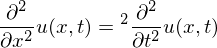

In [3]:
eq

In [4]:
X,T = pde_separate_mul(eq, u(x, t), [X(x), T(t)])

In [5]:
xs=dsolve(Eq(X,-beta))
ts=dsolve(Eq(T,-beta))

In [6]:
str(xs)[9:]

'C1*exp(-x*sqrt(-beta)) + C2*exp(x*sqrt(-beta)))'

In [7]:
str(ts)[9:]

'C1*exp(-t*sqrt(-beta)/с) + C2*exp(t*sqrt(-beta)/с))'

In [8]:
x = Symbol('x')
t = Symbol('t')
c = Symbol('c')
ux = C1*cos(sqrt(beta)*x) + C2*sin(sqrt(beta)*x)
ut = C3*cos(sqrt(beta)*t/c) + C4*sin(sqrt(beta)*t/c)
u = ut*ux

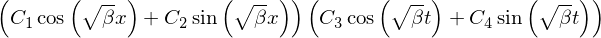

In [9]:
u=u.subs(c,1)
u

In [10]:
eq1 = Eq(ux,sin(pi*x)).subs(x,0)
eq2 = Eq(ux,sin(pi*x)).subs(x,1)

In [11]:
eq1

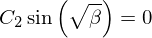

In [12]:
eq2.subs(C1,0)

In [13]:
b=solve(Eq(sin(sqrt(beta)),0))
b

In [14]:
Eq(ux.subs([(C1,0),(beta,b[1]),(t,0)]),sin(pi*x))

In [15]:
Eq(C2,1)

In [16]:
u.subs([(C1,0),(C2,1),(beta,b[1])])

In [17]:
Eq(diff(u.subs([(C1,0),(C2,1),(beta,b[1])]),t),sin(pi*x)).subs(t,0)

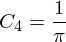

In [18]:
Eq(C4,1/pi)

In [19]:
u1 = u.subs([(C1,0),(C2,1),(C4,1/pi),(beta,b[1])]).subs(t,0)
Eq(u1,sin(pi*x))

In [20]:
Eq(C3, 1)

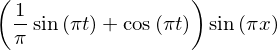

In [21]:
u.subs([(C1,0),(C2,1),(C3,1),(C4,1/pi),(beta,b[1])])

In [22]:
str(u)

'(C_1*cos(sqrt(beta)*x) + C_2*sin(sqrt(beta)*x))*(C_3*cos(sqrt(beta)*t) + C_4*sin(sqrt(beta)*t))'

In [23]:
n = 30
x1 = np.linspace(0,1,n)
u = np.ones(n)

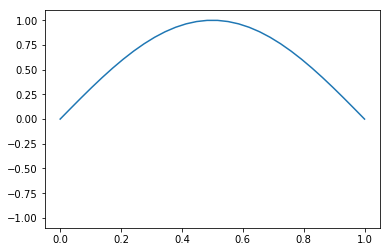

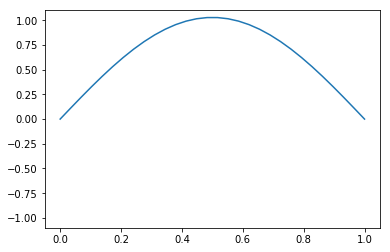

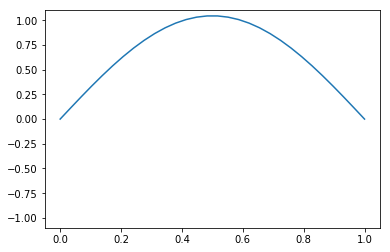

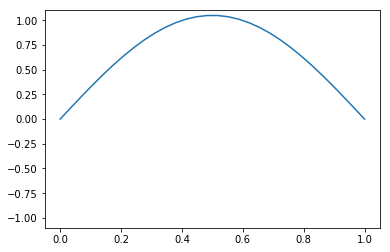

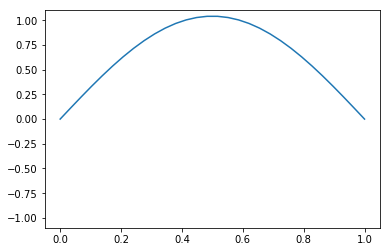

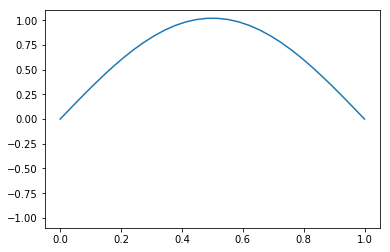

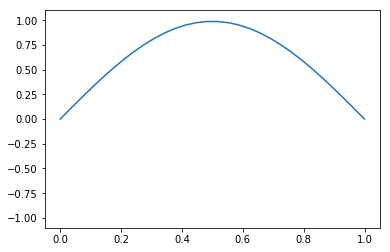

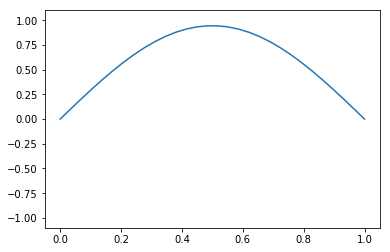

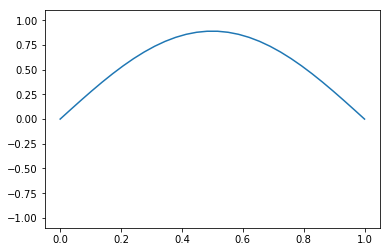

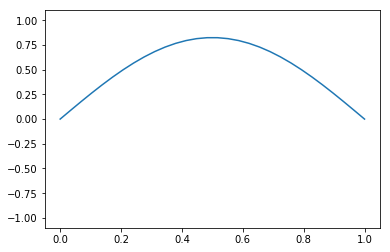

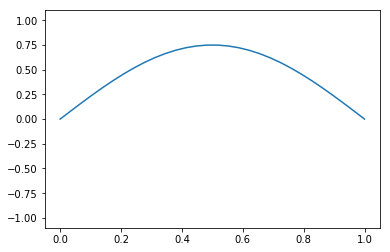

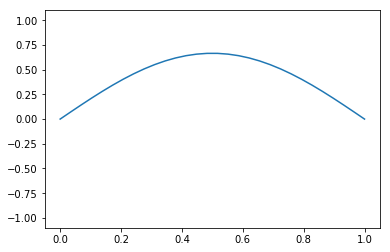

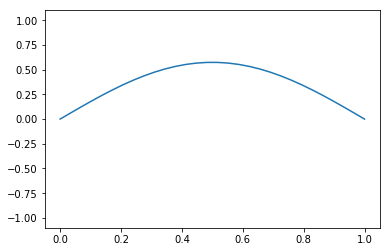

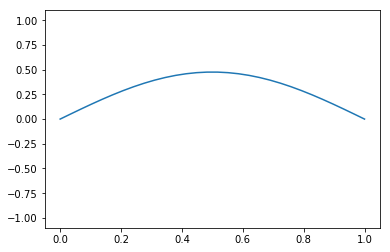

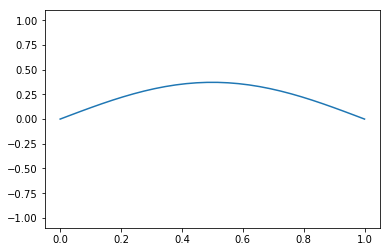

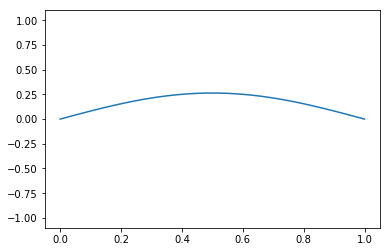

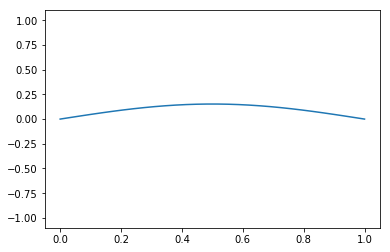

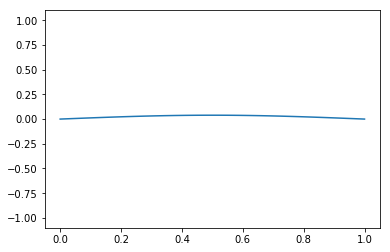

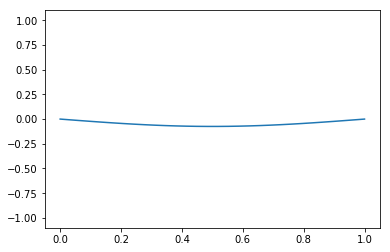

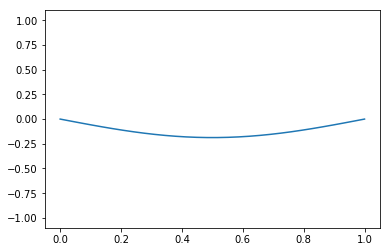

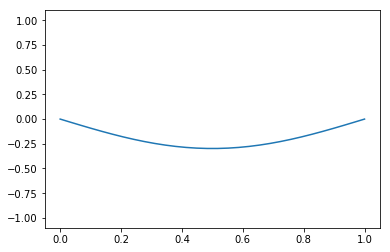

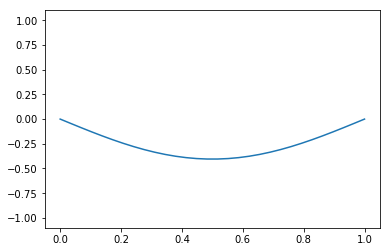

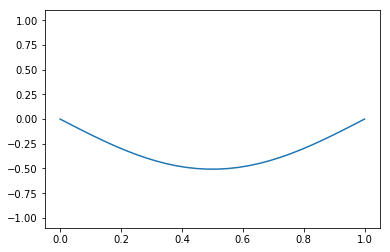

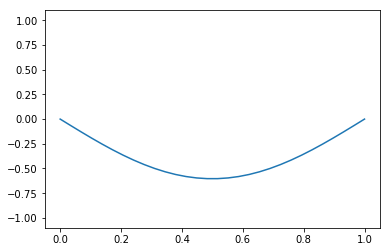

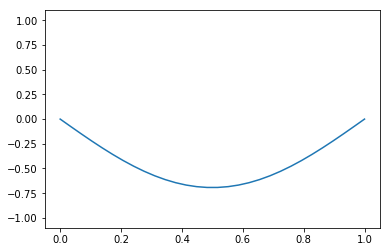

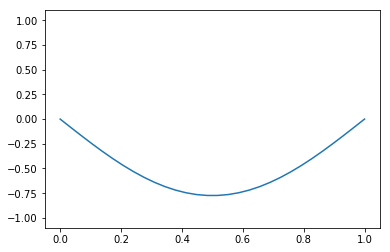

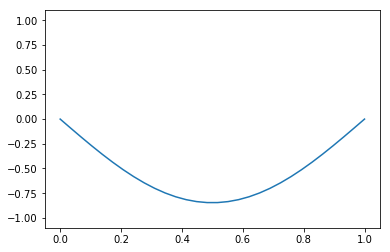

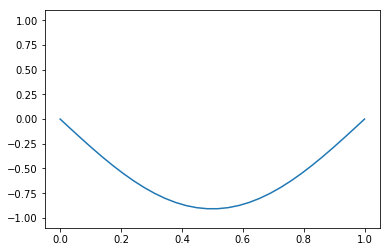

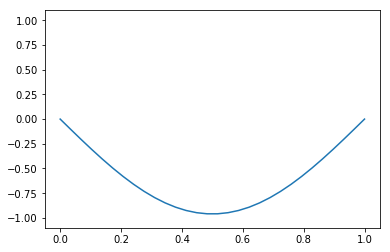

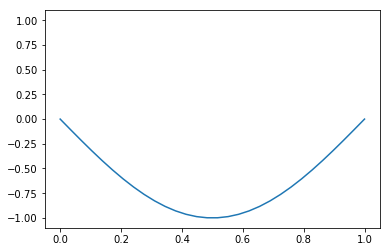

In [24]:
for t1 in x1:
    u = (np.sin(np.pi*t1)/np.pi + np.cos(np.pi*t1))*np.sin(np.pi*x1)
    plt.plot(x1,u)
    plt.ylim([-1.1,1.1])
    plt.show()